In [1]:
""" Utils """
import math, sys
import numpy as np
import matplotlib.pyplot as plt
import time
from ipywidgets import interact, interactive
from scipy import integrate
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import cnames
from matplotlib import animation
import random
import pandas as pd
from tqdm.notebook import tqdm

In [ ]:
"Rossler System"

def x_dot(x1, y1, z1, x2, y2, z2,alp):
    x1_dot=-1*wo1*y1-z1+alp*(x2-x1)
    x2_dot=-1*wo2*y2-z2+alp*(x1-x2)
    return x1_dot,x2_dot

def y_dot(x1, y1, z1, x2, y2, z2):
    y1_dot=wo1*x1+a*y1
    y2_dot=wo2*x2+a*y2
    return y1_dot,y2_dot

def z_dot(x1, y1, z1, x2, y2, z2):
    z1_dot=b+z1*(x1-c)
    z2_dot=b+z2*(x2-c)
    return z1_dot,z2_dot

In [ ]:
def RungeKutta4(a1,b1,c1,a2,b2,c2, alp, n):

    x1 = np.zeros(n)
    y1 = np.zeros(n)
    z1 = np.zeros(n)

    x2 = np.zeros(n)
    y2 = np.zeros(n)
    z2 = np.zeros(n)
    t = np.zeros(n)

    x1[0] = a1
    y1[0] = b1
    z1[0] = c1

    x2[0] = a2
    y2[0] = b2
    z2[0] = c2
    t[0] = 0

    #Compute the approximate solution at equally spaced times.
    for k in range (n-1):

        t[k+1] = t[k] + dt

        k1,u1 = x_dot(x1[k], y1[k], z1[k], x2[k], y2[k], z2[k],alp)
        l1,v1 = y_dot(x1[k], y1[k], z1[k], x2[k], y2[k], z2[k])
        m1,w1 = z_dot(x1[k], y1[k], z1[k], x2[k], y2[k], z2[k])

        k2,u2 = x_dot((x1[k] + 0.5*k1*dt), (y1[k] + 0.5*l1*dt), (z1[k] + 0.5*m1*dt),(x2[k] + 0.5*u1*dt), (y2[k] + 0.5*v1*dt), (z2[k] + 0.5*w1*dt),alp)
        l2,v2 = y_dot((x1[k] + 0.5*k1*dt), (y1[k] + 0.5*l1*dt), (z1[k] + 0.5*m1*dt),(x2[k] + 0.5*u1*dt), (y2[k] + 0.5*v1*dt), (z2[k] + 0.5*w1*dt))
        m2,w2 = z_dot((x1[k] + 0.5*k1*dt), (y1[k] + 0.5*l1*dt), (z1[k] + 0.5*m1*dt),(x2[k] + 0.5*u1*dt), (y2[k] + 0.5*v1*dt), (z2[k] + 0.5*w1*dt))

        k3,u3 = x_dot((x1[k] + 0.5*k2*dt), (y1[k] + 0.5*l2*dt), (z1[k] + 0.5*m2*dt), (x2[k] + 0.5*u2*dt), (y2[k] + 0.5*v2*dt), (z2[k] + 0.5*w2*dt),alp)
        l3,v3 = y_dot((x1[k] + 0.5*k2*dt), (y1[k] + 0.5*l2*dt), (z1[k] + 0.5*m2*dt), (x2[k] + 0.5*u2*dt), (y2[k] + 0.5*v2*dt), (z2[k] + 0.5*w2*dt))
        m3,w3 = z_dot((x1[k] + 0.5*k2*dt), (y1[k] + 0.5*l2*dt), (z1[k] + 0.5*m2*dt), (x2[k] + 0.5*u2*dt), (y2[k] + 0.5*v2*dt), (z2[k] + 0.5*w2*dt))

        k4,u4 = x_dot((x1[k] + k3*dt), (y1[k] + l3*dt), (z1[k] + m3*dt), (x2[k] + u3*dt), (y2[k] + v3*dt), (z2[k] + w3*dt),alp)
        l4,v4 = y_dot((x1[k] + k3*dt), (y1[k] + l3*dt), (z1[k] + m3*dt), (x2[k] + u3*dt), (y2[k] + v3*dt), (z2[k] + w3*dt))
        m4,w4 = z_dot((x1[k] + k3*dt), (y1[k] + l3*dt), (z1[k] + m3*dt), (x2[k] + u3*dt), (y2[k] + v3*dt), (z2[k] + w3*dt))

        x1[k+1] = x1[k] + (dt*(k1 + 2*k2 + 2*k3 + k4) / 6)
        y1[k+1] = y1[k] + (dt*(l1 + 2*l2 + 2*l3 + l4) / 6)
        z1[k+1] = z1[k] + (dt*(m1 + 2*m2 + 2*m3 + m4) / 6)
        x2[k+1] = x2[k] + (dt*(u1 + 2*u2 + 2*u3 + u4) / 6)
        y2[k+1] = y2[k] + (dt*(v1 + 2*v2 + 2*v3 + v4) / 6)
        z2[k+1] = z2[k] + (dt*(w1 + 2*w2 + 2*w3 + w4) / 6)

    return x1,y1,z1,x2,y2,z2, t

In [ ]:
def eAlpha_and_Avg_feq(tmp,alp,N): #Corecct the function----------------------------

  tmp1,tmp2,tmp3=0,0,0
  x_1, y_1, z_1, x_2, y_2, z_2, t=[],[],[],[],[],[],[]
  x_1, y_1, z_1, x_2, y_2, z_2, t = RungeKutta4(tmp[0],tmp[1],tmp[2],tmp[3],tmp[4],tmp[5],alp,N)

  tmp1=sum(abs(x1 - x2) for x1, x2 in zip(x_1, x_2)) #total_absolute_difference
  e1 = tmp1/N #average_difference
  tmp2=sum(abs(y1 - y2) for y1, y2 in zip(y_1, y_2)) #total_absolute_difference
  e2 = tmp2/N #average_difference
  tmp3=sum(abs(z1 - z2) for z1, z2 in zip(z_1, z_2)) #total_absolute_difference
  e3 = tmp3/N #average_difference
  e=(e1+e2+e3)/3

  return e #,t,x_1, y_1, z_1, x_2, y_2, z_2

In [ ]:
from joblib import Parallel, delayed

In [ ]:
""" Initial values unchanged """
wo1 = 0.97+0.02
wo2 = 0.97-0.02
a = 0.165
b= 0.2
c= 10
N= int(2000/0.01)
dt=0.01
E=[]

for i in tqdm(range(0,1)):
    tmp=random.sample(range(-10,10), 6)
    res = Parallel(n_jobs=3)(delayed(eAlpha_and_Avg_feq)(tmp,alp,N) for alp in np.arange(0.00,0.084,0.004))
    E.append(res)

  0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
A=pd.DataFrame(E)
E_new=A.sum(axis=0)
k=len(E)

In [ ]:
#E_new

0     5.552474
1     6.212804
2     6.006184
3     6.403968
4     6.445650
5     6.526779
6     6.476364
7     6.653931
8     6.788809
9     6.722995
10    5.757634
11    5.087822
12    4.763929
13    4.357963
14    4.150367
15    4.016556
16    3.745010
17    3.324497
18    3.292570
19    3.083530
20    3.001857
dtype: float64

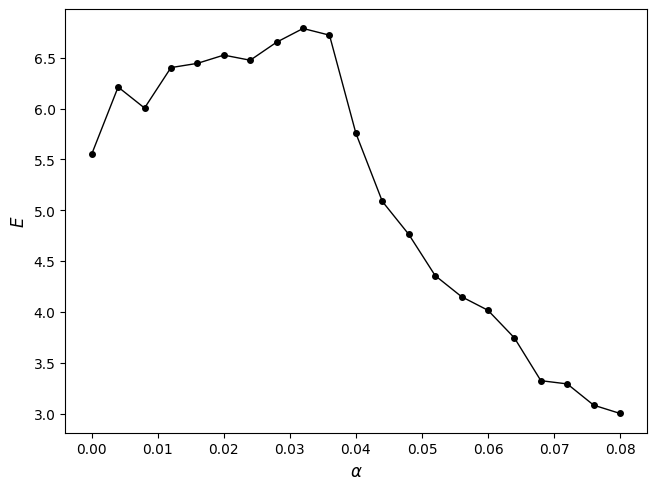

In [ ]:
plt.figure (figsize = (7.5,5.5))
plt.plot( np.arange(0.00,0.084,0.004),E_new/k, linewidth = 1, color = 'black',marker='o', markersize=4)
plt.ylabel(r'$E$',fontsize=12)
plt.xlabel(r'$\alpha$',fontsize=12)
plt.savefig('Img3_2.pdf', format='pdf')
plt.show()


In [ ]:
A.to_csv('A_for_E_new_Pase1.csv', index=False)